In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dftrain = pd.read_csv('Hackathon_train_V2.csv' , sep = ';')
dftest = pd.read_csv('Hackathon_test_V2.csv' , sep = ';')

In [3]:
dftrain

,movie_ID,num_critic_for_reviews,picture_type,duration,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,movie_facebook_likes,num_voted_users,language,num_user_for_reviews,budget,origin_country,title_year,movie_rating,aspect_ratio,countries_launched_in,content_rating,gross
0,1,590.0,Color,67.0,36.0,NaN,19608,842,0,306697.0,English,714.0,4.202473e+08,USA,2010,4.1,2.39,87.0,PG-13,126203320.0
1,2,126.0,Color,127.0,79.0,12000.0,506,50,11000,44198.0,English,251.0,4.465423e+06,USA,2005,7.9,2.39,4.0,R,5128124.0
2,3,50.0,Color,126.0,0.0,25976.0,23081,1607,3591,153876.0,English,1.0,1.392281e+08,USA,1993,7.0,1.89,63.0,R,44886089.0
3,4,393.0,Color,130.0,770.0,22371.0,709,0,0,150012.0,English,303.0,1.907334e+07,UK,2015,8.0,1.89,1.0,R,35024475.0
4,5,190.0,Color,109.0,453.0,18000.0,11000,2000,0,94892.0,NaN,189.0,5.271869e+07,USA,2008,6.8,1.89,16.0,R,26415649.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,121.0,Color,106.0,162.0,21.0,5,3,0,26926.0,English,156.0,8.650862e+05,USA,2003,8.1,2.39,6.0,R,4581222.0
7046,7047,385.0,Color,86.0,0.0,1290.0,954,976,26895,20336.0,English,159.0,1.617386e+06,USA,2002,3.4,1.89,1.0,R,1163508.0
7047,7048,198.0,Color,89.0,66.0,137000.0,1000,1000,0,57446.0,English,369.0,4.992146e+07,USA,2008,6.0,1.89,24.0,R,31691811.0
7048,7049,46.0,Color,55.0,NaN,0.0,0,0,727,22.0,English,NaN,3.458877e+07,USA,2002,3.4,1.89,37.0,R,11508423.0


In [4]:
dftrain.isnull().sum()

movie_ID                     0
num_critic_for_reviews     122
picture_type               426
duration                   195
director_facebook_likes    156
actor_1_facebook_likes     198
actor_2_facebook_likes       0
actor_3_facebook_likes       0
movie_facebook_likes         0
num_voted_users            189
language                   126
num_user_for_reviews        77
budget                     105
origin_country             146
title_year                   0
movie_rating                 0
aspect_ratio                 0
countries_launched_in      245
content_rating             155
gross                        0
dtype: int64

In [5]:
dftest.isnull().sum()

movie_ID                    0
num_critic_for_reviews     42
picture_type               61
duration                    0
director_facebook_likes     0
actor_1_facebook_likes      0
actor_2_facebook_likes      0
actor_3_facebook_likes      0
movie_facebook_likes        0
num_voted_users            14
num_user_for_reviews        0
language                   47
budget                     33
origin_country             42
title_year                  0
movie_rating                0
aspect_ratio                0
countries_launched_in      72
content_rating             71
dtype: int64

movie_ID                 movie_ID                   1.000000
budget                   gross                      0.707312
gross                    budget                     0.707312
                         num_critic_for_reviews     0.673272
num_critic_for_reviews   gross                      0.673272
num_user_for_reviews     gross                      0.640303
gross                    num_user_for_reviews       0.640303
num_user_for_reviews     num_critic_for_reviews     0.564344
num_critic_for_reviews   num_user_for_reviews       0.564344
actor_2_facebook_likes   actor_3_facebook_likes     0.544146
actor_3_facebook_likes   actor_2_facebook_likes     0.544146
num_critic_for_reviews   budget                     0.444810
budget                   num_critic_for_reviews     0.444810
countries_launched_in    num_voted_users            0.420110
num_voted_users          countries_launched_in      0.420110
budget                   num_user_for_reviews       0.418733
num_user_for_reviews    

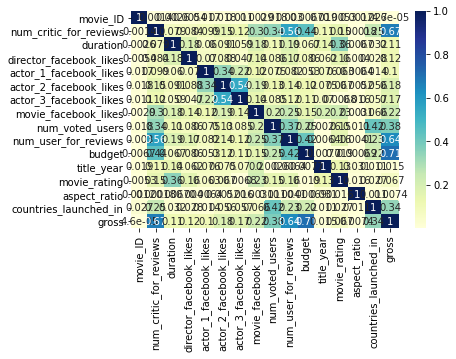

In [6]:
corr = dftrain.corr().abs()
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True , annot_kws={'size': 10})
s = corr.unstack()
so = s.sort_values(kind="quicksort")
print(so[::-1][15:75])

In [7]:
dftrain['budget'].fillna(dftrain['budget'].mean(),inplace=True)
dftrain['num_critic_for_reviews'].fillna(dftrain['num_critic_for_reviews'].mean(),inplace=True)
dftrain['num_user_for_reviews'].fillna(dftrain['num_user_for_reviews'].mean(),inplace=True)
dftrain['num_voted_users'].fillna(dftrain['num_voted_users'].mean(),inplace=True)
dftrain['countries_launched_in'].fillna(dftrain['countries_launched_in'].mean(),inplace=True)
dftrain['movie_facebook_likes'].fillna(dftrain['movie_facebook_likes'].mean(),inplace=True)
dftrain['movie_rating'].fillna(dftrain['movie_rating'].mean(),inplace=True)
dftrain['actor_2_facebook_likes'].fillna(dftrain['actor_2_facebook_likes'].mean(),inplace=True)

In [8]:
dftest['budget'].fillna(dftest['budget'].mean(),inplace=True)
dftest['num_critic_for_reviews'].fillna(dftest['num_critic_for_reviews'].mean(),inplace=True)
dftest['num_user_for_reviews'].fillna(dftest['num_user_for_reviews'].mean(),inplace=True)
dftest['num_voted_users'].fillna(dftest['num_voted_users'].mean(),inplace=True)
dftest['countries_launched_in'].fillna(dftest['countries_launched_in'].mean(),inplace=True)
dftest['movie_facebook_likes'].fillna(dftest['movie_facebook_likes'].mean(),inplace=True)
dftest['movie_rating'].fillna(dftest['movie_rating'].mean(),inplace=True)
dftest['actor_2_facebook_likes'].fillna(dftest['actor_2_facebook_likes'].mean(),inplace=True)

In [9]:
dftest['actor_3_facebook_likes'].fillna(dftest['actor_3_facebook_likes'].mean(),inplace=True)
dftrain['actor_3_facebook_likes'].fillna(dftrain['actor_3_facebook_likes'].mean(),inplace=True)

In [10]:
dftest['actor_1_facebook_likes'].fillna(dftest['actor_1_facebook_likes'].mean(),inplace=True)
dftrain['actor_1_facebook_likes'].fillna(dftrain['actor_1_facebook_likes'].mean(),inplace=True)

In [11]:
dftrain['content_rating'].fillna(dftrain['content_rating'].mode(),inplace=True)
dftest['content_rating'].fillna(dftest['content_rating'].mode(),inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le1 = LabelEncoder()
le2 = LabelEncoder()

In [14]:
dftrain['content_rating'] = le1.fit_transform(dftrain['content_rating'])
dftest['content_rating'] = le1.fit_transform(dftest['content_rating'])

num_voted_users         num_voted_users           1.000000
movie_ID                movie_ID                  1.000000
gross                   budget                    0.702960
budget                  gross                     0.702960
gross                   num_critic_for_reviews    0.667195
num_critic_for_reviews  gross                     0.667195
gross                   num_user_for_reviews      0.634435
num_user_for_reviews    gross                     0.634435
num_critic_for_reviews  num_user_for_reviews      0.556567
num_user_for_reviews    num_critic_for_reviews    0.556567
actor_2_facebook_likes  actor_3_facebook_likes    0.544146
actor_3_facebook_likes  actor_2_facebook_likes    0.544146
content_rating          gross                     0.502718
gross                   content_rating            0.502718
num_critic_for_reviews  budget                    0.438276
budget                  num_critic_for_reviews    0.438276
                        num_user_for_reviews      0.4127

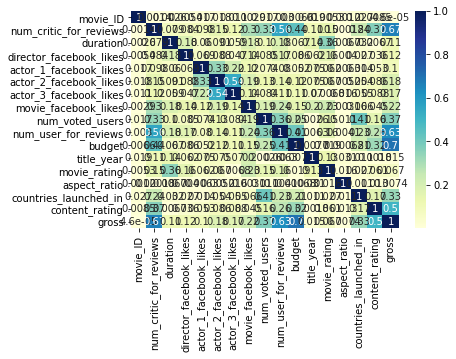

In [15]:
corr = dftrain.corr().abs()
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True , annot_kws={'size': 10})
s = corr.unstack()
so = s.sort_values(kind="quicksort")
print(so[::-1][15:75])

In [16]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [17]:
x_train,xtest,y_train,y_test = train_test_split(dftrain[['budget','num_critic_for_reviews','num_user_for_reviews','num_voted_users','countries_launched_in','movie_facebook_likes','movie_rating','actor_2_facebook_likes','actor_1_facebook_likes','actor_3_facebook_likes','content_rating']],dftrain.gross,test_size=0.15,random_state=42)

In [18]:
xg = XGBRegressor(n_estimators=1500)
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1500, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [19]:
xg.score(xtest,y_test)

0.8288524410356495

In [20]:
from sklearn.linear_model import Lasso

In [21]:
ls = Lasso()
ls.fit(x_train,y_train)

Lasso()

In [22]:
ls.score(xtest,y_test)

0.7115684131426211

In [23]:
from sklearn.linear_model import Ridge

In [24]:
rd = Ridge()
rd.fit(x_train,y_train)

C:\Users\Sai Ganesh Yadav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.42935e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge()

In [25]:
rd.score(xtest,y_test)

0.7115701048312466